In [1]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import numpy as np
import seaborn as sns 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import (GradientBoostingClassifier,RandomForestClassifier)

from sklearn.metrics import accuracy_score

# Prétraitement des données 

In [2]:
# Importation du fichier contenant les events et les time series
df_csv=pd.read_csv('child-mind-institute-detect-sleep-states/train_events.csv')
df_csv

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07T09:17:00-0400
14506,fe90110788d2,35,onset,NaN,NaN


In [3]:
# Valeurs nulles
df_csv.isnull().sum()

series_id       0
night           0
event           0
step         4923
timestamp    4923
dtype: int64

In [4]:
df_csv.dropna(inplace=True)
df_csv

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0,2017-09-05T09:26:00-0400
14502,fe90110788d2,33,onset,556560.0,2017-09-05T22:30:00-0400
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400


In [5]:
# convertir step en entier naturel
df_csv['step'] = df_csv['step'].astype(int)
df_csv

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152,2017-09-05T09:26:00-0400
14502,fe90110788d2,33,onset,556560,2017-09-05T22:30:00-0400
14503,fe90110788d2,33,wakeup,560604,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620,2017-09-06T23:35:00-0400


In [6]:
chemin = 'child-mind-institute-detect-sleep-states/train_series.parquet'
table = pq.read_table(chemin)
df1 = table.to_pandas()
df1

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
127946335,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204
127946336,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233
127946337,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202
127946338,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199


In [7]:
df1

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
127946335,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204
127946336,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233
127946337,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202
127946338,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199


In [8]:
# enmo : intensité de l'accélération (infos sur l'activité et l'inactivité physique)
# anglez : position du bras par rapport à lla verticale du corps

# le but est de détecter le moment où une personne s'endort et se réveille en utilisant des données d'accéléromètre

In [9]:
# Combiner les deux tables
df_combined = pd.merge(df1, df_csv, on=['series_id', 'timestamp', 'step'], how='right')
df_combined

,series_id,step,timestamp,anglez,enmo,night,event
0,038441c925bb,4992,2018-08-14T22:26:00-0400,-78.690598,0.0099,1,onset
1,038441c925bb,10932,2018-08-15T06:41:00-0400,-61.578201,0.0263,1,wakeup
2,038441c925bb,20244,2018-08-15T19:37:00-0400,-6.387400,0.0182,2,onset
3,038441c925bb,27492,2018-08-16T05:41:00-0400,-45.355099,0.0165,2,wakeup
4,038441c925bb,39996,2018-08-16T23:03:00-0400,-1.786700,0.0000,3,onset
...,...,...,...,...,...,...,...
9580,fe90110788d2,547152,2017-09-05T09:26:00-0400,-56.768902,0.0042,32,wakeup
9581,fe90110788d2,556560,2017-09-05T22:30:00-0400,-16.586700,0.0000,33,onset
9582,fe90110788d2,560604,2017-09-06T04:07:00-0400,-43.050900,0.0000,33,wakeup
9583,fe90110788d2,574620,2017-09-06T23:35:00-0400,1.519100,0.0066,34,onset


In [10]:
df_combined.sort_values(by='timestamp', inplace=True)

In [11]:
# Convertir le timestamp en objet datetime
#df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'])

# Trier les données par timestamp
#df_combined.sort_values(by='timestamp', inplace=True)

In [12]:
df_combined

,series_id,step,timestamp,anglez,enmo,night,event
9519,fe90110788d2,21048,2017-08-05T22:44:00-0400,48.083099,0.0505,2,onset
9520,fe90110788d2,27852,2017-08-06T08:11:00-0400,38.782799,0.0000,2,wakeup
9521,fe90110788d2,38064,2017-08-06T22:22:00-0400,-20.355499,0.0000,3,onset
9522,fe90110788d2,42384,2017-08-07T04:22:00-0400,-71.877502,0.0000,3,wakeup
9523,fe90110788d2,54060,2017-08-07T20:35:00-0400,-50.026199,0.0000,4,onset
...,...,...,...,...,...,...,...
6964,c535634d7dcd,100428,2019-07-03T07:44:00-0400,23.942200,0.0000,6,wakeup
6965,c535634d7dcd,111600,2019-07-03T23:15:00-0400,-28.768801,0.0000,7,onset
6966,c535634d7dcd,117492,2019-07-04T07:26:00-0400,-78.070602,0.0000,7,wakeup
6967,c535634d7dcd,127956,2019-07-04T21:58:00-0400,-27.979099,0.0193,8,onset


In [13]:
# encoder event en 0 et 1 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_combined['event'] = le.fit_transform(df_combined['event'])

In [14]:
df_combined['event'] = le.fit_transform(df_combined['event'])
df_combined

,series_id,step,timestamp,anglez,enmo,night,event
9519,fe90110788d2,21048,2017-08-05T22:44:00-0400,48.083099,0.0505,2,0
9520,fe90110788d2,27852,2017-08-06T08:11:00-0400,38.782799,0.0000,2,1
9521,fe90110788d2,38064,2017-08-06T22:22:00-0400,-20.355499,0.0000,3,0
9522,fe90110788d2,42384,2017-08-07T04:22:00-0400,-71.877502,0.0000,3,1
9523,fe90110788d2,54060,2017-08-07T20:35:00-0400,-50.026199,0.0000,4,0
...,...,...,...,...,...,...,...
6964,c535634d7dcd,100428,2019-07-03T07:44:00-0400,23.942200,0.0000,6,1
6965,c535634d7dcd,111600,2019-07-03T23:15:00-0400,-28.768801,0.0000,7,0
6966,c535634d7dcd,117492,2019-07-04T07:26:00-0400,-78.070602,0.0000,7,1
6967,c535634d7dcd,127956,2019-07-04T21:58:00-0400,-27.979099,0.0193,8,0


In [15]:
#df_combined["timestamp"] = pd.to_datetime(df_combined["timestamp"])
#df_combined

In [17]:
df_combined.describe()

,step,anglez,enmo,night,event,hour,minutes,day,month,year
count,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000
mean,214352.123944,-9.690042,0.015072,12.861555,0.500156,11.785915,28.736463,15.991549,6.496296,2017.997913
std,141268.408192,46.174774,0.037144,8.168517,0.500026,7.971730,17.405290,8.821798,3.667756,0.660566
min,936.000000,-89.776802,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,95436.000000,-48.502800,0.000000,6.000000,0.000000,6.000000,14.000000,8.000000,3.000000,2018.000000
50%,200604.000000,-16.017700,0.001300,12.000000,1.000000,8.000000,29.000000,16.000000,6.000000,2018.000000
75%,317520.000000,28.466299,0.017400,19.000000,1.000000,21.000000,44.000000,24.000000,10.000000,2018.000000
max,739392.000000,89.765404,0.858400,43.000000,1.000000,23.000000,59.000000,31.000000,12.000000,2019.000000


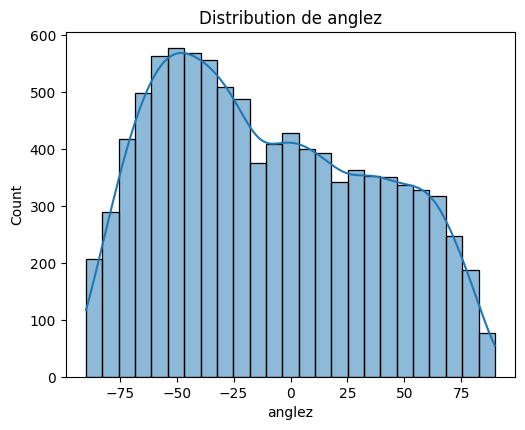

In [18]:
# Distribution des caractéristiques
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_combined['anglez'], kde=True)
plt.title('Distribution de anglez')

plt.tight_layout()
plt.show()

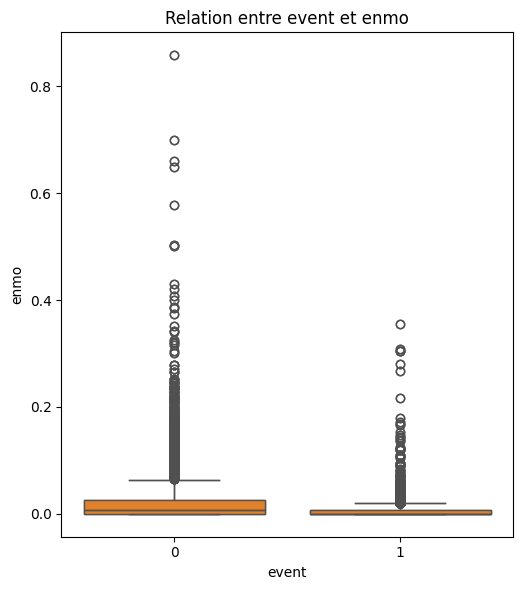

In [19]:
# Relation entre enmo et la variable cible
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
sns.boxplot(x='event', y='enmo', data=df_combined)
plt.title('Relation entre event et enmo')

plt.subplot(1, 2, 2)
sns.boxplot(x='event', y='enmo', data=df_combined)
plt.title('Relation entre event et enmo')

plt.tight_layout()
plt.show()

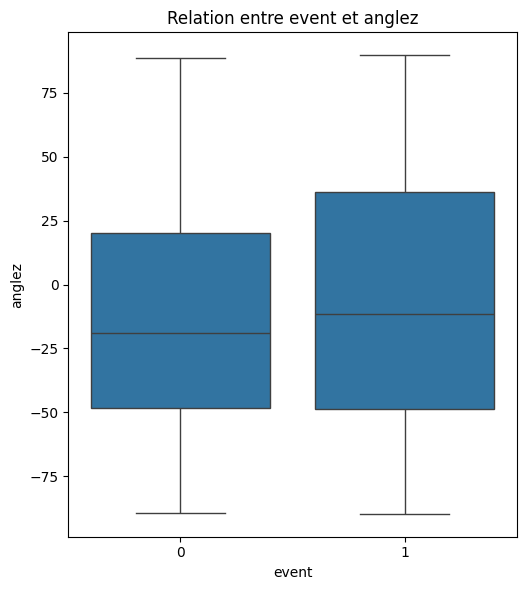

In [20]:
# Relation entre angleZ et la variable cible
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
sns.boxplot(x='event', y='anglez', data=df_combined)
plt.title('Relation entre event et anglez')

plt.tight_layout()
plt.show()

In [21]:
# normalisation de enmo et angleZ
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_combined[['anglez', 'enmo']])  # Normalisation des données

In [22]:
scaled_data

array([[0.7678412 , 0.05883039],
       [0.71604115, 0.        ],
       [0.3866573 , 0.        ],
       ...,
       [0.0652003 , 0.        ],
       [0.344196  , 0.02248369],
       [0.40030813, 0.        ]], dtype=float32)

In [23]:
df_combined.columns

Index(['series_id', 'step', 'timestamp', 'anglez', 'enmo', 'night', 'event',
       'dt', 'hour', 'minutes', 'Horaire', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
# Création des variables temporelles à partir de timeStamp

df_combined['dt'] = pd.to_datetime(df_combined.timestamp,format = '%Y-%m-%dT%H:%M:%S%z').astype("datetime64[ns, UTC-04:00]")
df_combined['hour'] = df_combined['dt'].dt.hour
df_combined['minutes'] = df_combined['dt'].dt.minute
df_combined['Horaire'] = df_combined['dt'].dt.timetz
df_combined['day'] = df_combined['dt'].dt.day
df_combined['month'] = df_combined['dt'].dt.month
df_combined['year'] = df_combined['dt'].dt.year

df_combined

In [77]:
df_combined

,series_id,step,timestamp,anglez,enmo,night,event,dt,hour,minutes,Horaire,day,month,year
9519,fe90110788d2,21048,2017-08-05T22:44:00-0400,48.083099,0.0505,2,0,2017-08-05 22:44:00-04:00,22,44,22:44:00-04:00,5,8,2017
9520,fe90110788d2,27852,2017-08-06T08:11:00-0400,38.782799,0.0000,2,1,2017-08-06 08:11:00-04:00,8,11,08:11:00-04:00,6,8,2017
9521,fe90110788d2,38064,2017-08-06T22:22:00-0400,-20.355499,0.0000,3,0,2017-08-06 22:22:00-04:00,22,22,22:22:00-04:00,6,8,2017
9522,fe90110788d2,42384,2017-08-07T04:22:00-0400,-71.877502,0.0000,3,1,2017-08-07 04:22:00-04:00,4,22,04:22:00-04:00,7,8,2017
9523,fe90110788d2,54060,2017-08-07T20:35:00-0400,-50.026199,0.0000,4,0,2017-08-07 20:35:00-04:00,20,35,20:35:00-04:00,7,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,c535634d7dcd,100428,2019-07-03T07:44:00-0400,23.942200,0.0000,6,1,2019-07-03 07:44:00-04:00,7,44,07:44:00-04:00,3,7,2019
6965,c535634d7dcd,111600,2019-07-03T23:15:00-0400,-28.768801,0.0000,7,0,2019-07-03 23:15:00-04:00,23,15,23:15:00-04:00,3,7,2019
6966,c535634d7dcd,117492,2019-07-04T07:26:00-0400,-78.070602,0.0000,7,1,2019-07-04 07:26:00-04:00,7,26,07:26:00-04:00,4,7,2019
6967,c535634d7dcd,127956,2019-07-04T21:58:00-0400,-27.979099,0.0193,8,0,2019-07-04 21:58:00-04:00,21,58,21:58:00-04:00,4,7,2019


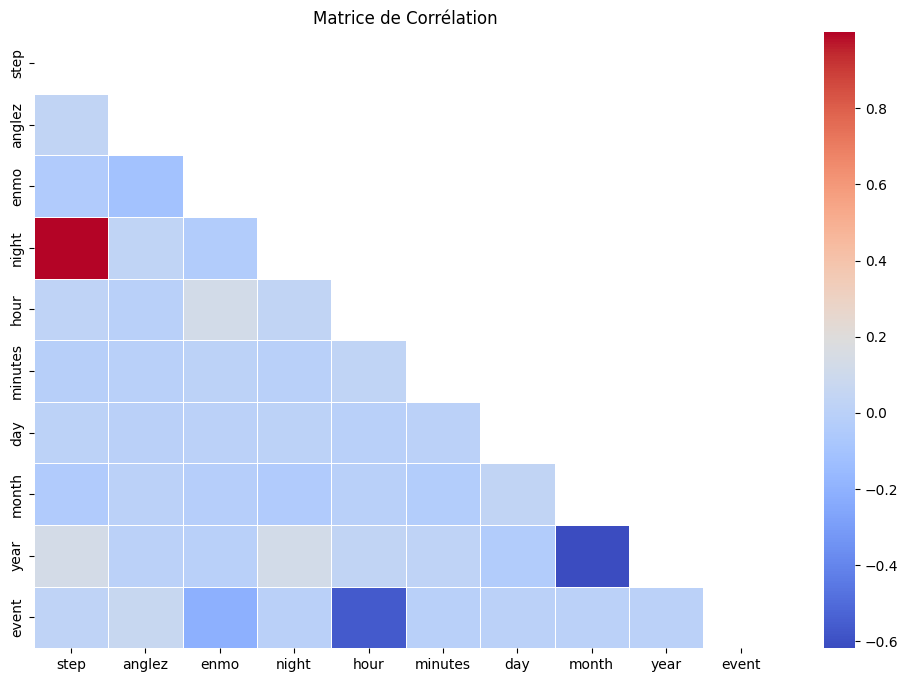

In [24]:
# Calcul des corrélations entre les variables

columns = ['step','anglez','enmo','night','hour','minutes'
                      ,'day', 'month', 'year','event']
                      
correlation_df = df_combined[columns]

correlation_matrix = correlation_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

L'analyse des corrélations a révélé que seule la variable hour créée à partir de timestamp présente une corrélation significative avec la variable cible, ainsi que enmo, suggérant une relation directe entre l'orientation spatiale et le temps de la journée avec event. 

Nous avons décidé alors de simplifier le problème et de le transformer le problème de prédiction d'événement en un problème de classification binaire, mettant l'accent sur les caractéristiques les plus pertinentes pour la prédiction de event (0 ou 1). 

Nous avons alors sélectionné les algorithmes suivants : 
- XGBoost
- Random Forest 
- SVM
- GradientBoosting
- SGDClassifier 

Et le modèle qui présentera la meilleure accuracy va servir pour notre prochaine prédiction (sur le fichier test).

# Modèles de machine learning

# XGBoost 

In [25]:
# Définitions des entrées du modèle
X = df_combined[['hour', 'anglez', 'enmo']]
y = df_combined['event']

# Répartition de la data en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialisation du modèle
XGBoost_model = XGBClassifier()
XGBoost_model.fit(X_train, y_train)

y_pred = XGBoost_model.predict(X_test)

# Evaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9780907668231612


# Random Forest Classifier 

In [26]:
RF_model = RandomForestClassifier()

X = df_combined[['hour', 'anglez', 'enmo']]
y = df_combined['event']

RF_model.fit(X_train, y_train)

feature_importances = RF_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

RFy_pred = RF_model.predict(X_test)
acc = accuracy_score(y_test, RFy_pred)

print("Accuracy:", acc)

print("Feature Importances:")
print(feature_importance_df)


Accuracy: 0.9765258215962441
Feature Importances:
  Feature  Importance
0    hour    0.882947
2    enmo    0.058728
1  anglez    0.058325


# Support Vector Classifier 

In [27]:
X = df_combined[['hour', 'anglez', 'enmo']]
y = df_combined['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='poly', C=1.0, verbose=True)

svm_model.fit(X_train, y_train)

svmy_pred = svm_model.predict(X_test)

accu = accuracy_score(y_test, svmy_pred)
print(f'Accuracy : {accu}')

[LibSVM]Accuracy : 0.8721961398017736


In [28]:
"""from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_combined[['hour', 'anglez', 'enmo']]
y = df_combined['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 10, 100], 'gamma': [0.1, 1, 10]}

# Initialisation du classificateur SVM
svm_model = SVC()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Meilleur modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de l'accuracy
accu = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accu}')"""

"from sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score\n\nX = df_combined[['hour', 'anglez', 'enmo']]\ny = df_combined['event']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nparam_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 10, 100], 'gamma': [0.1, 1, 10]}\n\n# Initialisation du classificateur SVM\nsvm_model = SVC()\n\n# Recherche des meilleurs hyperparamètres\ngrid_search = GridSearchCV(svm_model, param_grid, cv=3)\ngrid_search.fit(X_train, y_train)\n\n# Meilleurs hyperparamètres trouvés\nbest_params = grid_search.best_params_\n\n# Meilleur modèle avec les meilleurs hyperparamètres\nbest_model = grid_search.best_estimator_\n\n# Prédictions sur l'ensemble de test\ny_pred = best_model.predict(X_test)\n\n# Calcul de l'accuracy\naccu = accuracy_score(y_test, y_pred)\nprint(f'Accuracy : {accu}')"

Cette méthode effectue une recherche sur la grille des hyperparamètres pour un modèle SVM afin de trouver la meilleure configuration de paramètres pour prédire l'événement à partir des caractéristiques fournies, puis évalue la performance du modèle sur un ensemble de test en utilisant la précision comme mesure de performance.

Le but est de garder la meilleure configuration du modèle.

# Gradient Boosting Regressor

In [29]:
X = df_combined[['hour', 'anglez', 'enmo']]
y = df_combined['event']

# Création du gradientBossting
GBC_model = GradientBoostingClassifier()

# Répartition des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GBC_model.fit(X_train, y_train)

# Retourner l'importance des variables
feature_importances = GBC_model.feature_importances_

# Créer une dataframe pour simplifier l'affichage des feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Prédictions
GBCy_pred = GBC_model.predict(X_test)

# Calcul de l'accuracy
accu = accuracy_score(y_test, GBCy_pred)

print(f'Accuracy: {accu}')

print("Feature Importances:")
print(feature_importance_df)

Accuracy: 0.9770474700052165
Feature Importances:
  Feature  Importance
0    hour    0.992316
1  anglez    0.004788
2    enmo    0.002897


# SGDClassifier 

In [30]:
# Creation du SGDClassifier
X = df_combined[['hour', 'anglez', 'enmo']]
y = df_combined['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SGDC_model = SGDClassifier(max_iter=1000, random_state=42)

SGDC_model.fit(X_train, y_train)

# Retourner les coefficients avec les noms des features
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': SGDC_model.coef_.flatten()})
coef_df['AbsoluteCoefficient'] = coef_df['Coefficient'].abs()  
coef_df = coef_df.sort_values(by='AbsoluteCoefficient', ascending=False)

#Affichage des résulats 
print("Sorted Coefficients:")
print(coef_df[['Feature', 'Coefficient']])

# Calcul des prédictions
SGDCy_pred = SGDC_model.predict(X_test)

# Evaluation du modèle par l'accuracy
accu = accuracy_score(y_test, SGDCy_pred)

# Afficher l'accuracy
print(f'Accuracy: {accu}')

Sorted Coefficients:
  Feature  Coefficient
2    enmo   -20.399878
0    hour    -1.365851
1  anglez    -0.042213
Accuracy: 0.8210745957224831


# Validation croisée de nos modèles

In [31]:
def manual_cross_validation(model, X, y, test_size=0.6, random_state=None):
    """
    Perform manual cross-validation on a given model.

    Parameters:
    - model: The machine learning model to use for predictions.
    - X: The feature matrix.
    - y: The target variable.
    - test_size: The proportion of the data to include in the test split.
    - random_state: Seed for random number generation.

    Returns:
    - Dictionary containing evaluation metrics.
    """

    # Répartir la data en train et test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    y_pred = model.predict(X_test)

    # Calcul de l'accuracy
    acc = np.sqrt(accuracy_score(y_test, y_pred)) 

    metrics = {'Accuracy': acc}  
    return metrics

X_CV = df_combined[['hour', 'anglez', 'enmo']]
y_CV = df_combined['event']

X_train, X_test, y_train, y_test = train_test_split(X_CV, y_CV, test_size=0.6, random_state=44)

# Liste des modèles entrainés 
models = [XGBoost_model, RF_model, svm_model, GBC_model, SGDC_model] 

# Créer un dictionnaire pour stocker les résultats 
results = {}

# Performer la cross-validation pour chaque modèle
for model in models:
    model_name = type(model).__name__  
    model_results = manual_cross_validation(model, X_CV, y_CV, random_state=83)
    results[model_name] = model_results

# Afficher les résultats
for model_name, metrics in results.items():
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print()

XGBClassifier Metrics:
  Accuracy: 0.9956

RandomForestClassifier Metrics:
  Accuracy: 0.9975

SVC Metrics:
  Accuracy: 0.9325

GradientBoostingClassifier Metrics:
  Accuracy: 0.9912

SGDClassifier Metrics:
  Accuracy: 0.9077



# Prédiction des états avec nos modèles entrainés 

In [32]:
# Chargement des données de test
chemin = 'child-mind-institute-detect-sleep-states/test_series.parquet'
table = pq.read_table(chemin)
df_test = table.to_pandas()
df_test

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
445,0402a003dae9,145,2018-12-18T12:57:05-0500,-59.696899,0.0601
446,0402a003dae9,146,2018-12-18T12:57:10-0500,-35.656601,0.0427
447,0402a003dae9,147,2018-12-18T12:57:15-0500,-21.582399,0.0309
448,0402a003dae9,148,2018-12-18T12:57:20-0500,-42.616001,0.0328


In [43]:
# Imprimons les valeurs uniques de series_id
series_ids_uniques = df_test['series_id'].unique()
print("Différentes valeurs de series_id :")
for series_id in series_ids_uniques:
    print(series_id)

# Si vous voulez juste connaître le nombre de valeurs uniques de series_id :
nombre_series_ids_uniques = len(series_ids_uniques)
print("\nNombre de valeurs différentes de series_id :", nombre_series_ids_uniques)

Différentes valeurs de series_id :
038441c925bb
03d92c9f6f8a
0402a003dae9

Nombre de valeurs différentes de series_id : 3


Nous remarquons que les enregistrements ont été faits pour trois personnes différentes.

In [33]:
# Création des variables hour, minutes, seconds, day, month, year, horaire à partir de timeStamp

df_test['dt'] = pd.to_datetime(df_test.timestamp,format = '%Y-%m-%dT%H:%M:%S%z').astype("datetime64[ns, UTC-04:00]")
df_test['hour'] = df_test['dt'].dt.hour
df_test['minutes'] = df_test['dt'].dt.minute
df_test['Horaire'] = df_test['dt'].dt.timetz
df_test['day'] = df_test['dt'].dt.day
df_test['month'] = df_test['dt'].dt.month
df_test['year'] = df_test['dt'].dt.year

df_test

C:\Users\souma\AppData\Local\Temp\ipykernel_47200\3342757644.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_test['dt'] = pd.to_datetime(df_test.timestamp,format = '%Y-%m-%dT%H:%M:%S%z').astype("datetime64[ns, UTC-04:00]")


,series_id,step,timestamp,anglez,enmo,dt,hour,minutes,Horaire,day,month,year
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,2018-08-14 15:30:00-04:00,15,30,15:30:00-04:00,14,8,2018
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,2018-08-14 15:30:05-04:00,15,30,15:30:05-04:00,14,8,2018
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,2018-08-14 15:30:10-04:00,15,30,15:30:10-04:00,14,8,2018
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,2018-08-14 15:30:15-04:00,15,30,15:30:15-04:00,14,8,2018
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,2018-08-14 15:30:20-04:00,15,30,15:30:20-04:00,14,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
445,0402a003dae9,145,2018-12-18T12:57:05-0500,-59.696899,0.0601,2018-12-18 13:57:05-04:00,13,57,13:57:05-04:00,18,12,2018
446,0402a003dae9,146,2018-12-18T12:57:10-0500,-35.656601,0.0427,2018-12-18 13:57:10-04:00,13,57,13:57:10-04:00,18,12,2018
447,0402a003dae9,147,2018-12-18T12:57:15-0500,-21.582399,0.0309,2018-12-18 13:57:15-04:00,13,57,13:57:15-04:00,18,12,2018
448,0402a003dae9,148,2018-12-18T12:57:20-0500,-42.616001,0.0328,2018-12-18 13:57:20-04:00,13,57,13:57:20-04:00,18,12,2018


In [34]:
# XGBoost Prediction
X = df_test[['hour', 'anglez', 'enmo']]
event = XGBoost_model.predict(X)

#df_test['event']
event

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
# RandomForest Prediction
X = df_test[['hour', 'anglez', 'enmo']]
event = RF_model.predict(X)


#df_test['event']
event

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
# SVM Prediction
X = df_test[['hour', 'anglez', 'enmo']]
event = svm_model.predict(X)


#df_test['event']
event

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
# Gradient Boosting Prediction
X = df_test[['hour', 'anglez', 'enmo']]
event = GBC_model.predict(X)


#df_test['event'] = event
event

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [80]:
# SGDClassifier Prediction
X = df_test[['hour', 'anglez', 'enmo']]
event = SGDC_model.predict(X)


df_test['event'] = event
event

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [58]:
"""# Décodage de la variable event 
df_test['event'] = df_test['event'].astype(str)

df_test['event'] = df_test['event'].replace({0: 'onset', 1: 'wakeup'})

# Afficher le DataFrame mis à jour
df_test"""

,series_id,step,timestamp,anglez,enmo,dt,hour,minutes,Horaire,day,month,year,event
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,2018-08-14 15:30:00-04:00,15,30,15:30:00-04:00,14,8,2018,0
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,2018-08-14 15:30:05-04:00,15,30,15:30:05-04:00,14,8,2018,0
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,2018-08-14 15:30:10-04:00,15,30,15:30:10-04:00,14,8,2018,0
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,2018-08-14 15:30:15-04:00,15,30,15:30:15-04:00,14,8,2018,0
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,2018-08-14 15:30:20-04:00,15,30,15:30:20-04:00,14,8,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0402a003dae9,145,2018-12-18T12:57:05-0500,-59.696899,0.0601,2018-12-18 13:57:05-04:00,13,57,13:57:05-04:00,18,12,2018,0
446,0402a003dae9,146,2018-12-18T12:57:10-0500,-35.656601,0.0427,2018-12-18 13:57:10-04:00,13,57,13:57:10-04:00,18,12,2018,0
447,0402a003dae9,147,2018-12-18T12:57:15-0500,-21.582399,0.0309,2018-12-18 13:57:15-04:00,13,57,13:57:15-04:00,18,12,2018,0
448,0402a003dae9,148,2018-12-18T12:57:20-0500,-42.616001,0.0328,2018-12-18 13:57:20-04:00,13,57,13:57:20-04:00,18,12,2018,0


# Notre fichier Submission

Voici deux fichiers requis pour le projet :

- Un notebook contenant le code.
- Un fichier de soumission qui suit un format similaire à celui de l'exemple de soumission.

In [44]:
# Importation du fichier sample submission
sample_submission=pd.read_csv('child-mind-institute-detect-sleep-states/sample_submission.csv')
sample_submission

,row_id,series_id,step,event,score
0,0,038441c925bb,100,onset,0.0
1,1,038441c925bb,105,wakeup,0.0
2,2,03d92c9f6f8a,80,onset,0.5
3,3,03d92c9f6f8a,110,wakeup,0.5
4,4,0402a003dae9,90,onset,1.0
5,5,0402a003dae9,120,wakeup,1.0


Pour générer un fichier de soumission, nous allons procéder de la manière suivante : pour chaque individu, nous retiendrons le premier état 'onset' enregistré ainsi que le dernier 'wakeup' enregistré au cours d'une unique nuit. Ces données sélectionnées seront ensuite organisées dans une table spécifique pour constituer notre fichier de soumission.

In [90]:
def select_onset_last(df_group):
    # Vérifier si au moins une ligne satisfait la condition
    if (df_group['event'] == 0).any():
        return df_group[df_group['event'] == 0].iloc[[-1]]
    else:
        print("No 'onset' event found in group:")
        print(df_group)
        return pd.DataFrame()

def select_wakeup_last(df_group):
    # Vérifier si au moins une ligne satisfait la condition
    if (df_group['event'] == 1).any():
        return df_group[df_group['event'] == 1].iloc[[-1]]
    else:
        print("No 'wakeup' event found in group:")
        print(df_group)
        return pd.DataFrame()

# Diviser le DataFrame en groupes basés sur la colonne 'series_id'
grouped = df_test.groupby('series_id')

# Sélectionner la première ligne où l'événement est "onset" et la dernière ligne où l'événement est "wakeup" pour chaque groupe
onset_last = grouped.apply(select_onset_last)
wakeup_last = grouped.apply(select_wakeup_last)

# Concaténer les résultats dans une nouvelle table
result_table = pd.concat([onset_last, wakeup_last]).reset_index(drop=True)

# Afficher la table résultante
result_table

No 'wakeup' event found in group:
        series_id  step                 timestamp     anglez    enmo  \
0    038441c925bb     0  2018-08-14T15:30:00-0400   2.636700  0.0217   
1    038441c925bb     1  2018-08-14T15:30:05-0400   2.636800  0.0215   
2    038441c925bb     2  2018-08-14T15:30:10-0400   2.637000  0.0216   
3    038441c925bb     3  2018-08-14T15:30:15-0400   2.636800  0.0213   
4    038441c925bb     4  2018-08-14T15:30:20-0400   2.636800  0.0215   
..            ...   ...                       ...        ...     ...   
145  038441c925bb   145  2018-08-14T15:42:05-0400 -79.990601  0.0135   
146  038441c925bb   146  2018-08-14T15:42:10-0400 -80.028999  0.0136   
147  038441c925bb   147  2018-08-14T15:42:15-0400 -80.009300  0.0137   
148  038441c925bb   148  2018-08-14T15:42:20-0400 -80.066902  0.0135   
149  038441c925bb   149  2018-08-14T15:42:25-0400 -80.153503  0.0136   

                           dt  hour  minutes         Horaire  day  month  \
0   2018-08-14 15:30:00-0

C:\Users\souma\AppData\Local\Temp\ipykernel_47200\107979300.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  onset_first = grouped.apply(select_onset_first)
C:\Users\souma\AppData\Local\Temp\ipykernel_47200\107979300.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wakeup_first = grouped.apply(select_wakeup_first)


,series_id,step,timestamp,anglez,enmo,dt,hour,minutes,Horaire,day,month,year,event
0,038441c925bb,149.0,2018-08-14T15:42:25-0400,-80.153503,0.0136,2018-08-14 15:42:25-04:00,15.0,42.0,15:42:25-04:00,14.0,8.0,2018.0,0.0
1,03d92c9f6f8a,22.0,2018-05-31T12:01:50-0400,-29.132799,0.0405,2018-05-31 12:01:50-04:00,12.0,1.0,12:01:50-04:00,31.0,5.0,2018.0,0.0
2,0402a003dae9,149.0,2018-12-18T12:57:25-0500,7.029900,0.0081,2018-12-18 13:57:25-04:00,13.0,57.0,13:57:25-04:00,18.0,12.0,2018.0,0.0
3,03d92c9f6f8a,149.0,2018-05-31T12:12:25-0400,-88.216599,0.0000,2018-05-31 12:12:25-04:00,12.0,12.0,12:12:25-04:00,31.0,5.0,2018.0,1.0


In [91]:
result_table = result_table.drop(['timestamp','anglez','enmo','dt','hour','minutes','Horaire','day','month','year'], axis=1)
result_table

,series_id,step,event
0,038441c925bb,149.0,0.0
1,03d92c9f6f8a,22.0,0.0
2,0402a003dae9,149.0,0.0
3,03d92c9f6f8a,149.0,1.0


In [92]:
result_table = result_table.sort_values(by='series_id')
result_table

,series_id,step,event
0,038441c925bb,149.0,0.0
1,03d92c9f6f8a,22.0,0.0
3,03d92c9f6f8a,149.0,1.0
2,0402a003dae9,149.0,0.0


In [93]:
df = pd.DataFrame(result_table)

# Remplacer les valeurs dans la colonne 'event'
df['event'] = df['event'].replace({0.0: 'onset', 1.0: 'wakeup'})
df

,series_id,step,event
0,038441c925bb,149.0,onset
1,03d92c9f6f8a,22.0,onset
3,03d92c9f6f8a,149.0,wakeup
2,0402a003dae9,149.0,onset


Une approche pour évaluer le score dans ce contexte consiste à évaluer la loss fonction pour chaque résultat. 